# 14. K-Means Clustering

**Purpose:** Learn and revise **K-Means** clustering in Scikit-learn.

---

## What is K-Means?

**K-Means** is an **unsupervised** algorithm that partitions \( n \) points into **k** clusters. It alternates:

1. **Assign:** Each point is assigned to the **nearest centroid** (Euclidean distance).
2. **Update:** Each centroid is set to the **mean** of all points assigned to it.

This minimizes within-cluster sum of squares. The algorithm is iterative and can get stuck in local minima; **run multiple initializations** (n_init) and pick the best.

**Key idea:** You must choose **k**; no labels. **Scale features.** Good for compact, roughly spherical clusters; sensitive to outliers.

## Concepts to Remember

| Concept | Description |
|--------|-------------|
| **k** | Number of clusters; choose with elbow method, silhouette, or domain knowledge. |
| **Centroid** | Center of each cluster (mean of assigned points). |
| **n_init** | Number of random initializations; best run (lowest inertia) is kept. |
| **When to use** | Unsupervised grouping; preprocessing; when clusters are roughly spherical. |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(42)
X0 = np.random.randn(50, 2) + np.array([2, 2])
X1 = np.random.randn(50, 2) + np.array([6, 6])
X2 = np.random.randn(50, 2) + np.array([2, 6])
X = np.vstack([X0, X1, X2])

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [3]:
k = 3
model = KMeans(n_clusters=k, n_init=10, random_state=42)
model.fit(X_s)
labels = model.predict(X_s)
centroids = model.cluster_centers_

print("Inertia (within-cluster sum of squares):", model.inertia_)
print("Cluster sizes:", np.bincount(labels))

Inertia (within-cluster sum of squares): 61.16077905152656
Cluster sizes: [54 50 46]


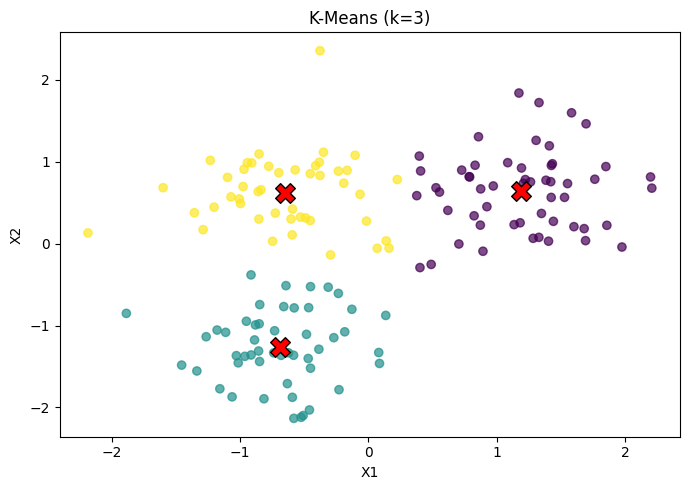

In [4]:
plt.figure(figsize=(7, 5))
plt.scatter(X_s[:, 0], X_s[:, 1], c=labels, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker="X", edgecolors="k")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"K-Means (k={k})")
plt.tight_layout()
plt.show()

## Key Takeaways

- **KMeans(n_clusters=k)**; **fit** then **predict** or **fit_predict**; **cluster_centers_** and **inertia_** are key attributes.
- Scale features; use **n_init** (e.g. 10) for stability. Choose k via elbow plot or **silhouette_score**.
- **MiniBatchKMeans** for very large datasets.